In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## I will focus on research data analysis, so I would love to use boxplot and scatterplot. Boxplot is very helpful for summarizing the distribution of dependent variables across different categories, allowing me to clearly understand the central tendency (mean, median) of each group while also helping to identify any outliers. Scatterplot offers me a view of relationships among variables, enabling me to visually access correlations, trends, and potential patterns.

In [3]:
df = pd.read_csv('cces_example_data.csv')
df.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [4]:
df.columns

Index(['pew_religimp', 'pew_churatd', 'sex', 'educ', 'nonwhite', 'age',
       'faminc_new', 'pid3', 'ideo5', 'QueerPhobia', 'ImmiPhobia',
       'InterGBiasParty', 'InterGBiasCand', 'InterGBiasSup', 'LibMediaUse',
       'ConMediaUse', 'Real_Threat', 'Symb_Threat', 'Evaluation', 'teamweight',
       'caseid'],
      dtype='object')

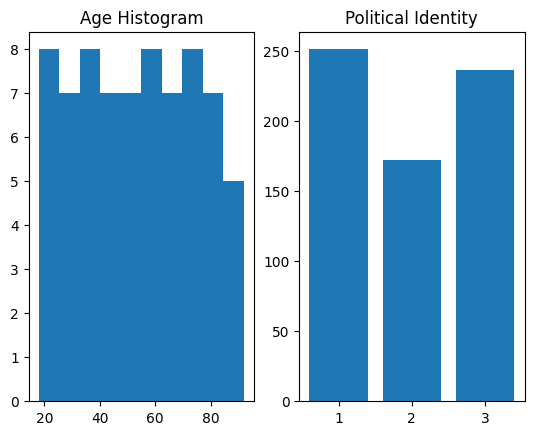

In [29]:
age_freq = df.groupby("age")['caseid'].count()
poli_freq = df.groupby('pid3')['caseid'].count()

fig1, ax1 = plt.subplots(1,2)
ax1[0].hist(x= age_freq.index)
ax1[0].set_title('Age Histogram')
ax1[1].bar(x = poli_freq.index, height = poli_freq)
ax1[1].set_title('Political Identity')
plt.show()

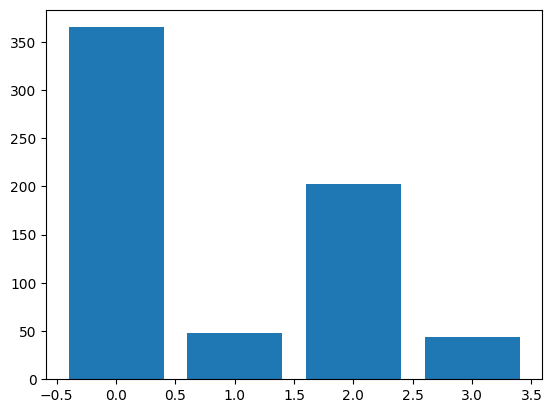

In [23]:
eva_freq = df.groupby('Evaluation')['caseid'].count()
eva_freq
fig2, ax2 = plt.subplots()
ax2.bar(x = eva_freq.index, height = eva_freq)
plt.show()

In a new code cell, create and show a figure that includes one axes that displays a scatter plot of the `ConMediaUse` and `ImmiPhobia` variables

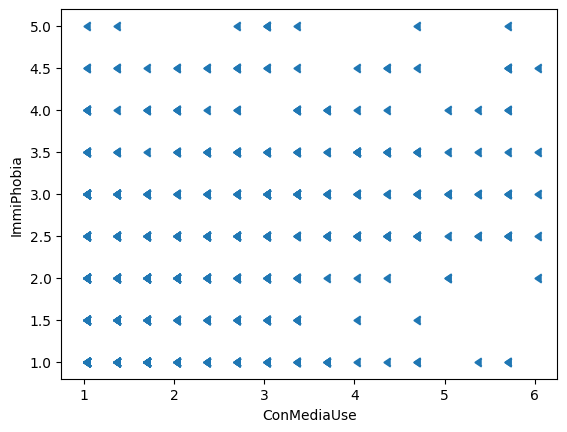

In [30]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = df['ConMediaUse'], y= df['ImmiPhobia'],marker = 4)
ax3.set_xlabel("ConMediaUse")
ax3.set_ylabel("ImmiPhobia")

plt.show()

We can't see any relationships or trends from this first plot, and data distribution seems very even. We probably improve it by invovling segmenting the data based on political identification (pid3). Using different markers and colors for each political group helps distinguish the groups visually and allows for easier interpretation. We could also try contour lines that estimate underlying patterns and density across the plot area to improve this scatterplot. Contour lines works well when the point density changes slowly across both the x and the y dimensions (Wilke, 2019, p. 160)

Wilke, C. O. (2019). Fundamentals of data visualization: a primer on making informative and compelling figures. O'Reilly Media.

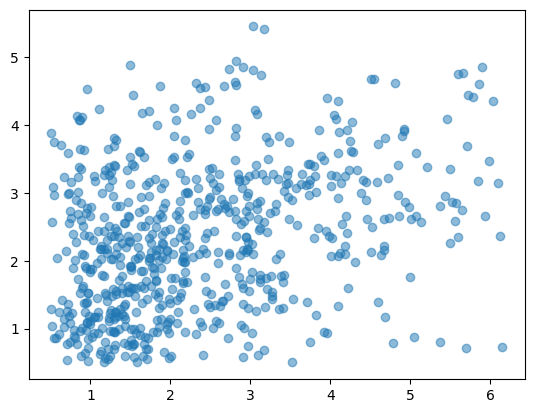

In [22]:
jittered_x = df['ConMediaUse'] + np.random.uniform(-0.5, 0.5, size=len(df))
jittered_y = df['ImmiPhobia'] + np.random.uniform(-0.5, 0.5, size=len(df))
fig3, ax3 = plt.subplots()
ax3.scatter(jittered_x, jittered_y, alpha=0.5)
plt.show()

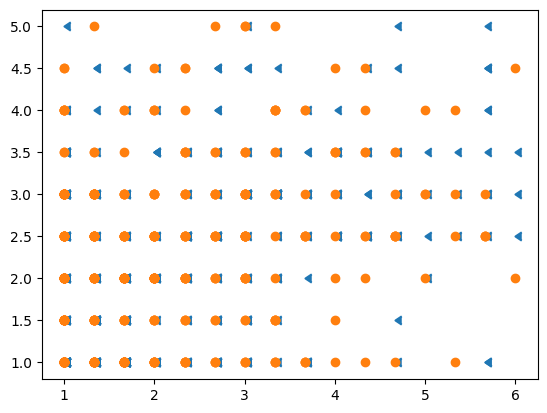

In [14]:
sex1 = df[df['sex'] == 1]
sex2 = df[df['sex'] == 2]

fig4, ax4 = plt.subplots()
ax4.scatter(x = sex1['ConMediaUse'], y = sex1['ImmiPhobia'], marker =4)
ax4.scatter(x = sex2['ConMediaUse'], y = sex2['ImmiPhobia'], marker ='o')

plt.show()

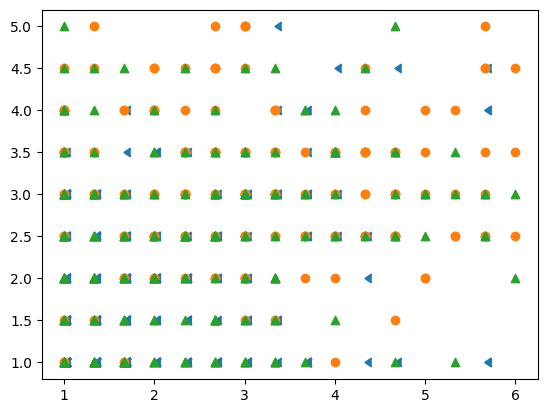

In [17]:
pid1 = df[df['pid3'] == 1]
pid2 = df[df['pid3'] == 2]
pid3 = df[df['pid3'] == 3]

fig4, ax4 = plt.subplots()
ax4.scatter(x = pid1['ConMediaUse'], y = pid1['ImmiPhobia'], marker =4)
ax4.scatter(x = pid2['ConMediaUse'], y = pid2['ImmiPhobia'], marker ='o')
ax4.scatter(x = pid3['ConMediaUse'], y = pid3['ImmiPhobia'], marker ='^')

plt.show()